In [1]:
%env DB_HOST=mongodb://localhost/openpath_prod_ccebikes
import emission.core.get_database as edb
import emission.storage.timeseries.aggregate_timeseries as esta
import emission.storage.timeseries.builtin_timeseries as estb
import emission.core.get_database as gdb

env: DB_HOST=mongodb://localhost/openpath_prod_ccebikes
Config file not found, returning a copy of the environment variables instead...
Retrieved config: {'DB_HOST': 'mongodb://localhost/openpath_prod_ccebikes', 'DB_RESULT_LIMIT': None}
Connecting to database URL mongodb://localhost/openpath_prod_ccebikes


In [2]:
pipeline_docs_cursor = gdb.get_timeseries_db().find({
    "metadata.key": "stats/pipeline_time",
})

# Display a sample of the documents
import pprint
pipeline_docs = list(pipeline_docs_cursor)
if pipeline_docs:
    single_doc = pipeline_docs[0]
    print("Single Document:")
    pprint.pprint(single_doc)
else:
    print("No documents found for 'stats/pipeline_time'.")

# Fetch multiple documents
pipeline_docs_sample = pipeline_docs[:5]  # Get first 5 documents
print("\nMultiple Documents:")
for doc in pipeline_docs_sample:
    pprint.pprint(doc)


Single Document:
{'_id': ObjectId('6482712ed308645566db8979'),
 'data': {'name': 'CLEAN_RESAMPLING',
          'reading': 0.42159995101974346,
          'ts': 1686270254.2292492},
 'metadata': {'key': 'stats/pipeline_time',
              'platform': 'server',
              'time_zone': 'America/Los_Angeles',
              'write_fmt_time': '2023-06-08T17:24:14.229314-07:00',
              'write_local_dt': {'day': 8,
                                 'hour': 17,
                                 'minute': 24,
                                 'month': 6,
                                 'second': 14,
                                 'timezone': 'America/Los_Angeles',
                                 'weekday': 3,
                                 'year': 2023},
              'write_ts': 1686270254.2293139},
 'user_id': UUID('9906f9af-16da-427c-a5ba-6cfef1a2e4d6')}

Multiple Documents:
{'_id': ObjectId('6482712ed308645566db8979'),
 'data': {'name': 'CLEAN_RESAMPLING',
          'reading': 0

In [3]:
import pandas as pd
from datetime import datetime, timedelta
import pytz

df = pd.json_normalize(pipeline_docs)
df.describe()


,metadata.write_ts,metadata.write_local_dt.year,metadata.write_local_dt.month,metadata.write_local_dt.day,metadata.write_local_dt.hour,metadata.write_local_dt.minute,metadata.write_local_dt.second,metadata.write_local_dt.weekday,data.ts,data.reading
count,2.775974e+06,2.775974e+06,2.775974e+06,2.775974e+06,2.775974e+06,2.775974e+06,2.775974e+06,2.775974e+06,2.775974e+06,2.775974e+06
mean,1.703929e+09,2.023433e+03,7.252923e+00,1.591412e+01,1.204326e+01,3.271894e+01,2.948633e+01,2.991551e+00,1.703929e+09,1.719903e+01
std,1.509817e+07,4.954901e-01,2.538359e+00,8.704166e+00,6.657106e+00,1.376301e+01,1.741897e+01,1.989418e+00,1.509817e+07,2.905953e+02
min,1.685997e+09,2.023000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.685997e+09,6.961636e-07
25%,1.690387e+09,2.023000e+03,6.000000e+00,9.000000e+00,7.000000e+00,2.600000e+01,1.400000e+01,1.000000e+00,1.690387e+09,7.743692e-02
50%,1.698702e+09,2.023000e+03,7.000000e+00,1.600000e+01,1.200000e+01,3.300000e+01,2.900000e+01,3.000000e+00,1.698702e+09,9.953548e-01
75%,1.718134e+09,2.024000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.200000e+01,4.500000e+01,5.000000e+00,1.718134e+09,5.793955e+00
max,1.733591e+09,2.024000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01,6.000000e+00,1.733591e+09,2.557319e+05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775974 entries, 0 to 2775973
Data columns (total 18 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   _id                               object 
 1   user_id                           object 
 2   metadata.key                      object 
 3   metadata.platform                 object 
 4   metadata.write_ts                 float64
 5   metadata.time_zone                object 
 6   metadata.write_local_dt.year      int64  
 7   metadata.write_local_dt.month     int64  
 8   metadata.write_local_dt.day       int64  
 9   metadata.write_local_dt.hour      int64  
 10  metadata.write_local_dt.minute    int64  
 11  metadata.write_local_dt.second    int64  
 12  metadata.write_local_dt.weekday   int64  
 13  metadata.write_local_dt.timezone  object 
 14  metadata.write_fmt_time           object 
 15  data.name                         object 
 16  data.ts                           fl

In [5]:
name = df['data.name'].unique()
print(name)

['CLEAN_RESAMPLING' 'CREATE_CONFIRMED_OBJECTS' 'USERCACHE'
 'LABEL_INFERENCE' 'USER_INPUT_MATCH_INCOMING' 'MODE_INFERENCE'
 'ACCURACY_FILTERING' 'TRIP_SEGMENTATION' 'SECTION_SEGMENTATION'
 'JUMP_SMOOTHING' 'EXPECTATION_POPULATION' 'CREATE_COMPOSITE_OBJECTS'
 'OUTPUT_GEN' 'STORE_USER_STATS' 'TRIP_SEGMENTATION/get_filters_in_df'
 'TRIP_SEGMENTATION/segment_into_trips_time/has_trip_ended'
 'TRIP_SEGMENTATION/segment_into_trips_time/calculations_per_iteration'
 'TRIP_SEGMENTATION/get_data_df'
 'TRIP_SEGMENTATION/handle_out_of_order_points'
 'TRIP_SEGMENTATION/segment_into_trips_time/get_filtered_points_pre_ts_diff_df'
 'TRIP_SEGMENTATION/segment_into_trips_time/filter_bogus_points'
 'TRIP_SEGMENTATION/segment_into_trips_time/get_transition_df'
 'TRIP_SEGMENTATION/get_time_series'
 'TRIP_SEGMENTATION/get_time_range_for_segmentation'
 'TRIP_SEGMENTATION/create_time_filter'
 'TRIP_SEGMENTATION/create_dist_filter'
 'TRIP_SEGMENTATION/segment_into_trips_time/loop'
 'TRIP_SEGMENTATION/segment_in

In [6]:
# import pandas as pd

# # Step 1: Filter for rows where data.name is "USERCACHE"
# usercache_df = df[df['data.name'] == "USERCACHE"]

# # Step 2: Convert metadata.write_ts to datetime
# usercache_df['datetime'] = pd.to_datetime(usercache_df['metadata.write_ts'], unit='s')

# # Step 3: Define the start date for filtering
# start_date = pd.Timestamp('2024-11-08')  # Adjust as needed

# # Step 4: Filter for rows since the start date
# usercache_df = usercache_df[usercache_df['datetime'] >= start_date]

# # Step 5: Group by hour and count executions
# hourly_execution_counts = usercache_df.groupby(usercache_df['datetime'].dt.floor('H')).size()

# # Step 6: Output the results
# if hourly_execution_counts.empty:
#     print("No executions of 'USERCACHE' since November 8.")
# else:
#     print("Hourly execution counts since November 8:")
#     print(hourly_execution_counts)


In [7]:
import os


# Step 0: Define the list of 'data.name' entries to exclude
# These are the 'Parent' functions
exclude_data_names = [
    'TRIP_SEGMENTATION/segment_into_trips',
    'TRIP_SEGMENTATION/segment_into_trips_dist/loop'
]

# Step 1: Filter for function-level data only (entries with slashes in 'data.name') and exclude specified names
function_level_df = df[
    df['data.name'].str.contains('/') &
    ~df['data.name'].isin(exclude_data_names)
].copy()

# Step 2: Select the relevant columns
selected_columns = function_level_df[['data.reading', 'data.name']].copy()

# Step 3: Data Cleaning
# Drop rows with missing values in 'data.reading' or 'data.name'
selected_columns.dropna(subset=['data.reading', 'data.name'], inplace=True)

# Ensure 'data.reading' is numeric
selected_columns = selected_columns[pd.to_numeric(selected_columns['data.reading'], errors='coerce').notnull()]


# Step 5: Aggregate 'data.reading' by 'data.name'

# Aggregation Using Sum
aggregated_sum = selected_columns.groupby('data.name', as_index=False)['data.reading'].sum()
aggregated_sum.rename(columns={'data.reading': 'total_reading'}, inplace=True)

# Aggregation Using Mean
aggregated_mean = selected_columns.groupby('data.name', as_index=False)['data.reading'].mean()
aggregated_mean.rename(columns={'data.reading': 'average_reading'}, inplace=True)

# Step 6: Determine the 80th percentile threshold based on aggregated values

# For Sum Aggregation
threshold_sum = aggregated_sum['total_reading'].quantile(0.80)

# For Mean Aggregation
threshold_mean = aggregated_mean['average_reading'].quantile(0.80)

# For Total Aggregation
threshold_total = selected_columns['data.reading'].quantile(0.80)

# Step 7: Split the DataFrame into top 20% and bottom 80% based on aggregated values

# Using Sum Aggregation
top20_sum = aggregated_sum[aggregated_sum['total_reading'] >= threshold_sum].sort_values(by='total_reading', ascending=False)
bottom80_sum = aggregated_sum[aggregated_sum['total_reading'] < threshold_sum].sort_values(by='total_reading', ascending=False)
top20_total = selected_columns[selected_columns['data.reading'] >= threshold_total].sort_values(by='data.reading', ascending=False)
bottom80_total = selected_columns[selected_columns['data.reading'] < threshold_total].sort_values(by='data.reading', ascending=False)

# Using Mean Aggregation
top20_mean = aggregated_mean[aggregated_mean['average_reading'] >= threshold_mean].sort_values(by='average_reading', ascending=False)
bottom80_mean = aggregated_mean[aggregated_mean['average_reading'] < threshold_mean].sort_values(by='average_reading', ascending=False)

# Step 8: Define the base directory and file paths
base_dir = os.getcwd()  # Current working directory

# Paths for Sum Aggregation
aggregated_sum_path = os.path.join(base_dir, 'aggregated_sum_function_level_1.csv')
top20_sum_path = os.path.join(base_dir, 'top20_function_level_sum_sorted_1.csv')
bottom80_sum_path = os.path.join(base_dir, 'bottom80_function_level_sum_sorted_1.csv')
top20_total_path = os.path.join(base_dir, 'top20_function_level_sum_sorted_1.csv')
bottom80_total_path = os.path.join(base_dir, 'bottom80_function_level_sum_sorted_1.csv')

# Paths for Mean Aggregation
aggregated_mean_path = os.path.join(base_dir, 'aggregated_mean_function_level_1.csv')
top20_mean_path = os.path.join(base_dir, 'top20_function_level_mean_sorted_1.csv')
bottom80_mean_path = os.path.join(base_dir, 'bottom80_function_level_mean_sorted_1.csv')

# Step 9: Save the aggregated and categorized DataFrames to CSV files

# Saving Sum Aggregation
aggregated_sum.to_csv(aggregated_sum_path, index=False)
top20_sum.to_csv(top20_sum_path, index=False)
bottom80_sum.to_csv(bottom80_sum_path, index=False)
top20_total.to_csv(top20_total_path, index=False)
bottom80_total.to_csv(bottom80_total_path, index=False)

print(f"Aggregated Sum Function-Level Data saved to {aggregated_sum_path}")
print(f"Top 20% (Sum) function-level data saved to {top20_sum_path}")
print(f"Bottom 80% (Sum) function-level data saved to {bottom80_sum_path}")
print(f"Top 20%  function-level data saved to {top20_total_path}")
print(f"Bottom 80% function-level data saved to {bottom80_total_path}")

# Saving Mean Aggregation
aggregated_mean.to_csv(aggregated_mean_path, index=False)
top20_mean.to_csv(top20_mean_path, index=False)
bottom80_mean.to_csv(bottom80_mean_path, index=False)

print(f"\nAggregated Mean Function-Level Data saved to {aggregated_mean_path}")
print(f"Top 20% (Mean) function-level data saved to {top20_mean_path}")
print(f"Bottom 80% (Mean) function-level data saved to {bottom80_mean_path}")

# Step 10: Verify the splits
print(f"\nSum Aggregation - Top 20% row count: {len(top20_sum)}")
print(f"Sum Aggregation - Bottom 80% row count: {len(bottom80_sum)}")

print(f"\nMean Aggregation - Top 20% row count: {len(top20_mean)}")
print(f"Mean Aggregation - Bottom 80% row count: {len(bottom80_mean)}")

# Step 11: Inspect some entries
print("\nSample Top 20% Sum Aggregation Entries:")
print(top20_sum.head())

print("\nSample Bottom 80% Sum Aggregation Entries:")
print(bottom80_sum.head())

print("\nSample Top 20% Mean Aggregation Entries:")
print(top20_mean.head())

print("\nSample Bottom 80% Mean Aggregation Entries:")
print(bottom80_mean.head())


Aggregated Sum Function-Level Data saved to /Users/rsimpson/e-mission-server/aggregated_sum_function_level_1.csv
Top 20% (Sum) function-level data saved to /Users/rsimpson/e-mission-server/top20_function_level_sum_sorted_1.csv
Bottom 80% (Sum) function-level data saved to /Users/rsimpson/e-mission-server/bottom80_function_level_sum_sorted_1.csv
Top 20%  function-level data saved to /Users/rsimpson/e-mission-server/top20_function_level_sum_sorted_1.csv
Bottom 80% function-level data saved to /Users/rsimpson/e-mission-server/bottom80_function_level_sum_sorted_1.csv

Aggregated Mean Function-Level Data saved to /Users/rsimpson/e-mission-server/aggregated_mean_function_level_1.csv
Top 20% (Mean) function-level data saved to /Users/rsimpson/e-mission-server/top20_function_level_mean_sorted_1.csv
Bottom 80% (Mean) function-level data saved to /Users/rsimpson/e-mission-server/bottom80_function_level_mean_sorted_1.csv

Sum Aggregation - Top 20% row count: 5
Sum Aggregation - Bottom 80% row cou

In [8]:
def average_pipeline_time(combined_df):
    avg_time_df = combined_df.groupby('data.name')['data.reading'].mean().reset_index()
    avg_time_df.rename(columns={'data.reading': 'average_time'}, inplace=True)
    
    print("\nAverage Pipeline Time per Step:")
    print(avg_time_df.sort_values(by='average_time', ascending=False))
    
    # Optionally, save to CSV
    avg_time_df.to_csv('average_pipeline_time_per_step.csv', index=False)

average_pipeline_time(df)


Average Pipeline Time per Step:
                                            data.name  average_time
37     TRIP_SEGMENTATION/segment_into_trips_time/loop    275.833194
20               TRIP_SEGMENTATION/segment_into_trips    233.274898
9                                SECTION_SEGMENTATION    101.454295
11                                  TRIP_SEGMENTATION     88.637517
28     TRIP_SEGMENTATION/segment_into_trips_dist/loop     43.187217
5                                      JUMP_SMOOTHING     29.145888
8                                          OUTPUT_GEN     28.692147
1                                    CLEAN_RESAMPLING     23.592714
3                            CREATE_CONFIRMED_OBJECTS      7.578975
39                                          USERCACHE      6.138794
13          TRIP_SEGMENTATION/create_places_and_trips      6.114928
40                          USER_INPUT_MATCH_INCOMING      5.668831
36  TRIP_SEGMENTATION/segment_into_trips_time/has_...      5.203754
6              

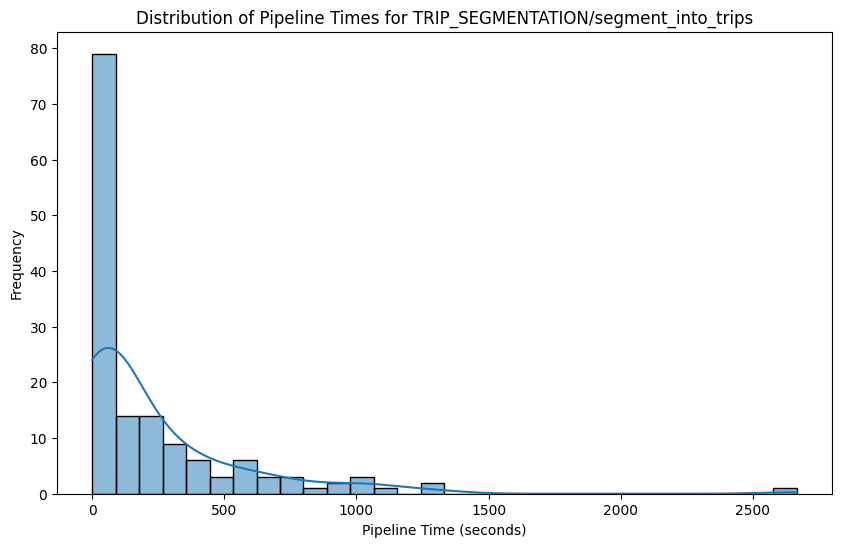

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def pipeline_time_distribution(combined_df, step_name):
    step_df = combined_df[combined_df['data.name'] == step_name]
    
    if step_df.empty:
        print(f"No data found for step: {step_name}")
        return
    
    plt.figure(figsize=(10,6))
    sns.histplot(step_df['data.reading'], bins=30, kde=True)
    plt.title(f"Distribution of Pipeline Times for {step_name}")
    plt.xlabel("Pipeline Time (seconds)")
    plt.ylabel("Frequency")
    plt.show()

pipeline_time_distribution(df, 'TRIP_SEGMENTATION/segment_into_trips')

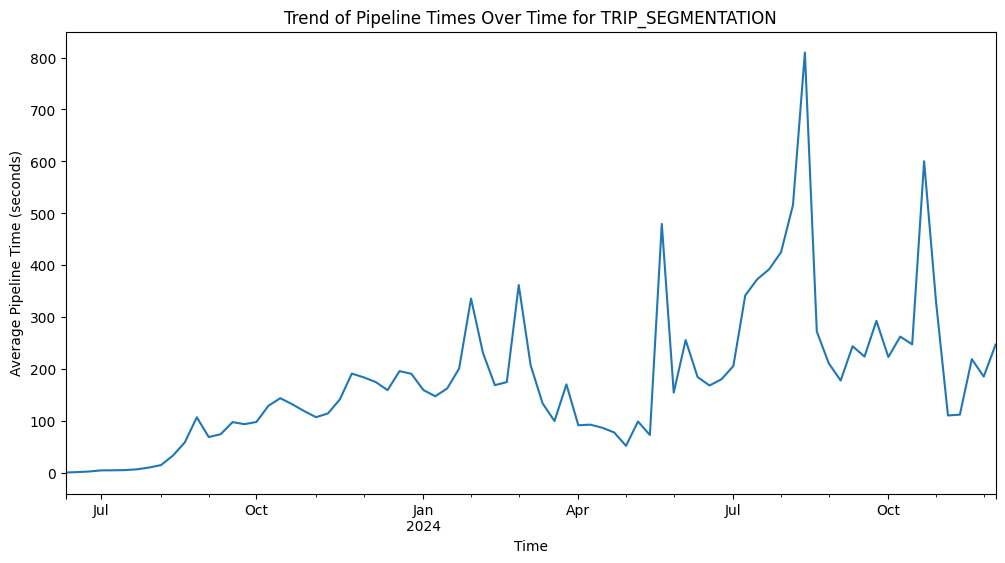

In [10]:
def pipeline_time_trends(combined_df, step_name, freq='D'):
    """
    Plots the trend of pipeline times over time for a specific step.
    :param freq: Resampling frequency ('D' for daily, 'W' for weekly, 'M' for monthly)
    """
    step_df = combined_df[combined_df['data.name'] == step_name].copy()
    
    if step_df.empty:
        print(f"No data found for step: {step_name}")
        return
    
    # Convert timestamp to datetime
    step_df['datetime'] = pd.to_datetime(step_df['metadata.write_ts'], unit='s')
    
    # Set datetime as index
    step_df.set_index('datetime', inplace=True)
    
    # Resample and calculate mean pipeline time
    resampled = step_df['data.reading'].resample(freq).mean()
    
    # Plotting
    plt.figure(figsize=(12,6))
    resampled.plot()
    plt.title(f"Trend of Pipeline Times Over Time for {step_name}")
    plt.xlabel("Time")
    plt.ylabel("Average Pipeline Time (seconds)")
    plt.show()

pipeline_time_trends(df, 'TRIP_SEGMENTATION', 'W')


Top 5 Bottleneck Pipeline Steps:
                                            data.name  average_time
23     TRIP_SEGMENTATION/segment_into_trips_time/loop    275.833194
1           TRIP_SEGMENTATION/create_places_and_trips      6.114928
22  TRIP_SEGMENTATION/segment_into_trips_time/has_...      5.203754
14  TRIP_SEGMENTATION/segment_into_trips_dist/has_...      0.331766
3                       TRIP_SEGMENTATION/get_data_df      0.134792


/var/folders/8j/284cnbzn2tzbfljhtsr17gsx2490jk/T/ipykernel_9922/3552898157.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_time', y='data.name', data=bottlenecks, palette='viridis')


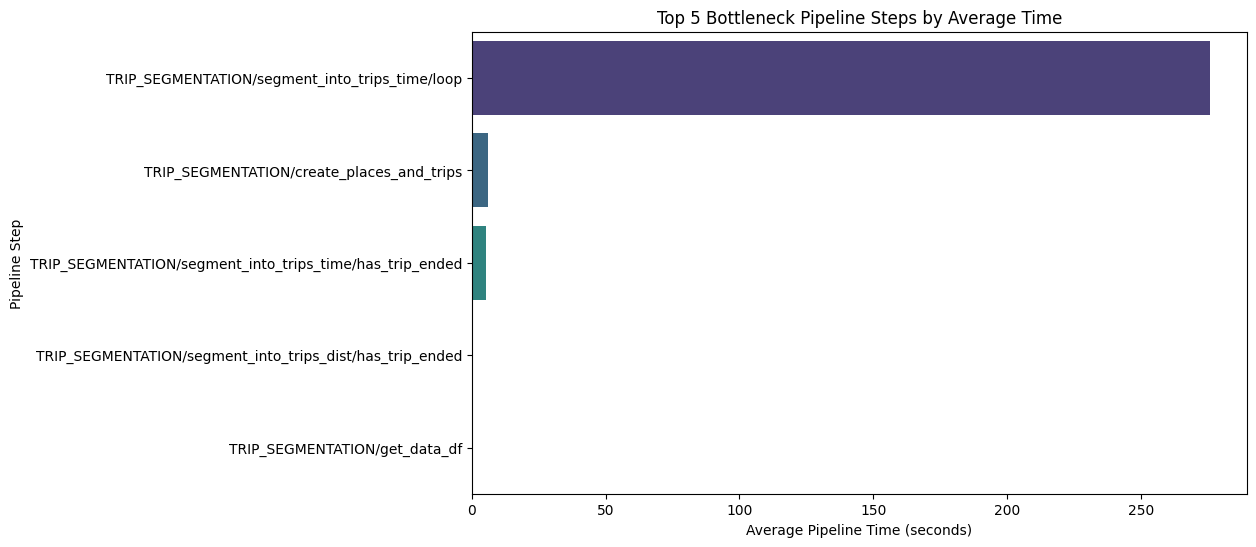

In [11]:
def identify_bottlenecks(combined_df, top_n=5):
    avg_time_df = combined_df.groupby('data.name')['data.reading'].mean().reset_index()
    avg_time_df.rename(columns={'data.reading': 'average_time'}, inplace=True)
    
    bottlenecks = avg_time_df.sort_values(by='average_time', ascending=False).head(top_n)
    
    print(f"\nTop {top_n} Bottleneck Pipeline Steps:")
    print(bottlenecks)
    
    # Optionally, visualize
    plt.figure(figsize=(10,6))
    sns.barplot(x='average_time', y='data.name', data=bottlenecks, palette='viridis')
    plt.title(f"Top {top_n} Bottleneck Pipeline Steps by Average Time")
    plt.xlabel("Average Pipeline Time (seconds)")
    plt.ylabel("Pipeline Step")
    plt.show()

identify_bottlenecks(function_level_df)

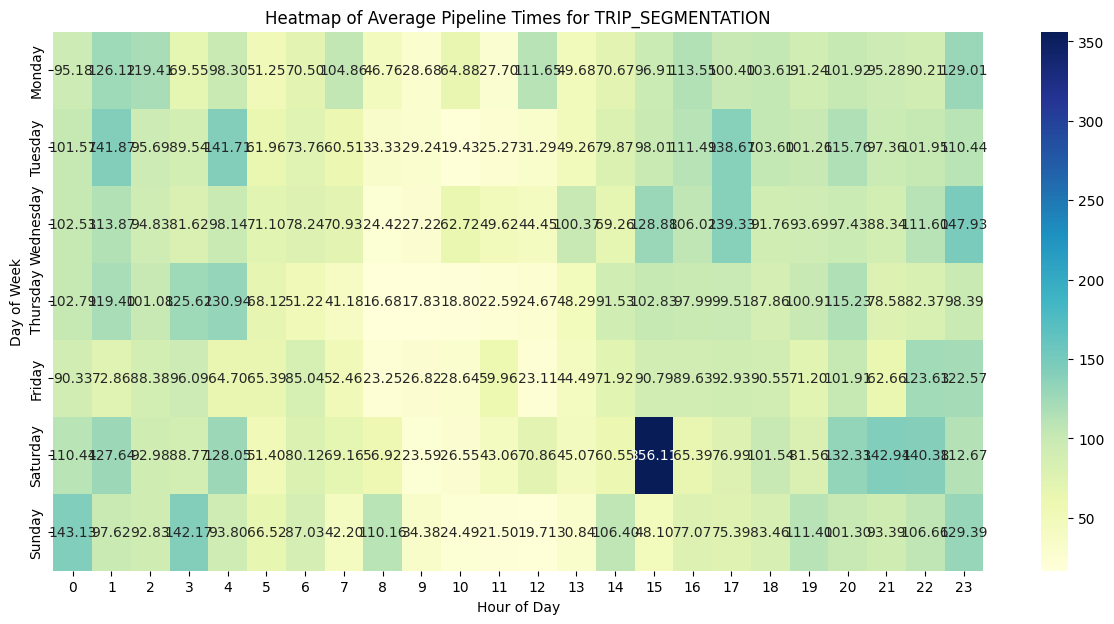

In [12]:
def heatmap_pipeline_times(combined_df, step_name):
    step_df = combined_df[combined_df['data.name'] == step_name].copy()
    
    if step_df.empty:
        print(f"No data found for step: {step_name}")
        return
    
    # Convert timestamp to datetime
    step_df['datetime'] = pd.to_datetime(step_df['metadata.write_ts'], unit='s')
    
    # Extract hour and day of week
    step_df['hour'] = step_df['datetime'].dt.hour
    step_df['day_of_week'] = step_df['datetime'].dt.day_name()
    
    # Create pivot table
    pivot = step_df.pivot_table(values='data.reading', index='day_of_week', columns='hour', aggfunc='mean')
    
    # Reorder days of the week
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    pivot = pivot.reindex(days_order)
    
    # Plot heatmap
    plt.figure(figsize=(15,7))
    sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".2f")
    plt.title(f"Heatmap of Average Pipeline Times for {step_name}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.show()


heatmap_pipeline_times(df, 'TRIP_SEGMENTATION')


Execution Time Variability per Pipeline Step:
                                            data.name  average_time_sec  \
11                                  TRIP_SEGMENTATION         88.637517   
9                                SECTION_SEGMENTATION        101.454295   
37     TRIP_SEGMENTATION/segment_into_trips_time/loop        275.833194   
20               TRIP_SEGMENTATION/segment_into_trips        233.274898   
5                                      JUMP_SMOOTHING         29.145888   
1                                    CLEAN_RESAMPLING         23.592714   
28     TRIP_SEGMENTATION/segment_into_trips_dist/loop         43.187217   
3                            CREATE_CONFIRMED_OBJECTS          7.578975   
8                                          OUTPUT_GEN         28.692147   
6                                     LABEL_INFERENCE          4.319230   
39                                          USERCACHE          6.138794   
36  TRIP_SEGMENTATION/segment_into_trips_time/has_...

/var/folders/8j/284cnbzn2tzbfljhtsr17gsx2490jk/T/ipykernel_9922/2891362776.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='data.reading', y='data.name', data=df, palette='coolwarm')


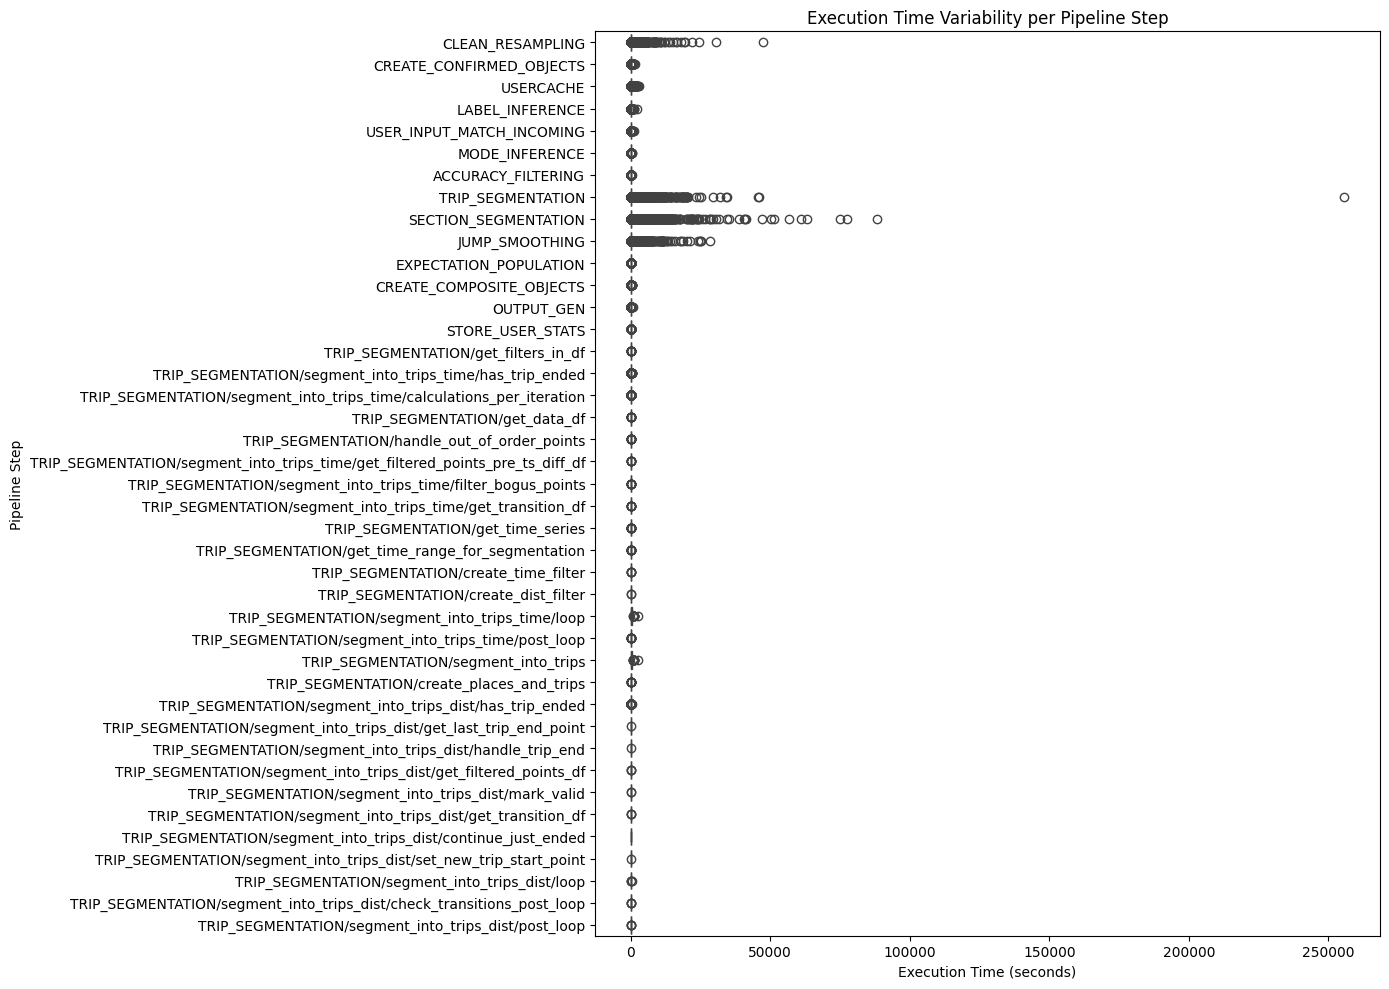

Saved execution time variability to 'execution_time_variability_per_step.csv'


In [13]:
def execution_time_variability_per_step(df):
    variability_df = df.groupby('data.name')['data.reading'].agg(['mean', 'std', 'var']).reset_index()
    variability_df.rename(columns={'mean': 'average_time_sec', 'std': 'std_dev_sec', 'var': 'variance_sec2'}, inplace=True)
    
    # Sort by standard deviation descending
    variability_df = variability_df.sort_values(by='std_dev_sec', ascending=False)
    
    print("\nExecution Time Variability per Pipeline Step:")
    print(variability_df)
    
    # Visualization: Box Plots to visualize variability
    plt.figure(figsize=(14,10))
    sns.boxplot(x='data.reading', y='data.name', data=df, palette='coolwarm')
    plt.title("Execution Time Variability per Pipeline Step")
    plt.xlabel("Execution Time (seconds)")
    plt.ylabel("Pipeline Step")
    plt.tight_layout()
    plt.show()
    
    # Save to CSV
    variability_df.to_csv('execution_time_variability_per_step.csv', index=False)
    print("Saved execution time variability to 'execution_time_variability_per_step.csv'")


execution_time_variability_per_step(df)


Average Proportion of Total Pipeline Time per Step:
                                            data.name  \
37     TRIP_SEGMENTATION/segment_into_trips_time/loop   
20               TRIP_SEGMENTATION/segment_into_trips   
9                                SECTION_SEGMENTATION   
28     TRIP_SEGMENTATION/segment_into_trips_dist/loop   
11                                  TRIP_SEGMENTATION   
8                                          OUTPUT_GEN   
5                                      JUMP_SMOOTHING   
13          TRIP_SEGMENTATION/create_places_and_trips   
1                                    CLEAN_RESAMPLING   
36  TRIP_SEGMENTATION/segment_into_trips_time/has_...   
39                                          USERCACHE   
3                            CREATE_CONFIRMED_OBJECTS   
40                          USER_INPUT_MATCH_INCOMING   
2                            CREATE_COMPOSITE_OBJECTS   
6                                     LABEL_INFERENCE   
7                                  

/var/folders/8j/284cnbzn2tzbfljhtsr17gsx2490jk/T/ipykernel_9922/3938384783.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_proportion_percent', y='data.name', data=step_contribution_df, palette='coolwarm')


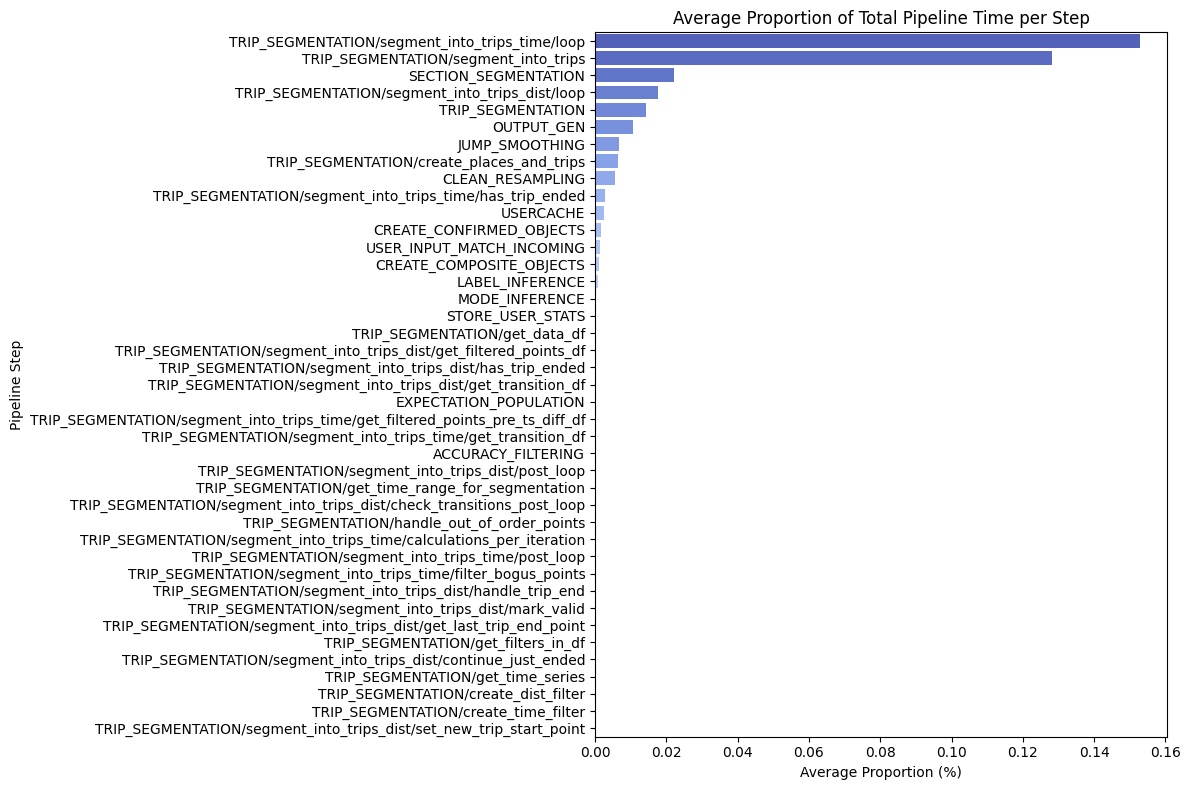

Saved step contribution analysis to 'average_proportion_total_time_per_step.csv'


In [14]:
def step_contribution_analysis(df):
    # Calculate total pipeline time per execution
    total_time_per_execution = df.groupby(['user_id', 'metadata.key'])['data.reading'].sum().reset_index()
    total_time_per_execution.rename(columns={'data.reading': 'total_pipeline_time_sec'}, inplace=True)
    
    # Merge total pipeline time back to the main DataFrame
    df = df.merge(total_time_per_execution, on=['user_id', 'metadata.key'])
    
    # Calculate proportion of each step's time to the total pipeline time
    df['step_proportion_percent'] = (df['data.reading'] / df['total_pipeline_time_sec']) * 100
    
    # Aggregate average proportion per step
    step_contribution_df = df.groupby('data.name')['step_proportion_percent'].mean().reset_index()
    step_contribution_df.rename(columns={'step_proportion_percent': 'average_proportion_percent'}, inplace=True)
    
    # Sort descending
    step_contribution_df = step_contribution_df.sort_values(by='average_proportion_percent', ascending=False)
    
    print("\nAverage Proportion of Total Pipeline Time per Step:")
    print(step_contribution_df)
    
    # Visualization: Horizontal Bar Chart
    plt.figure(figsize=(12,8))
    sns.barplot(x='average_proportion_percent', y='data.name', data=step_contribution_df, palette='coolwarm')
    plt.title("Average Proportion of Total Pipeline Time per Step")
    plt.xlabel("Average Proportion (%)")
    plt.ylabel("Pipeline Step")
    plt.tight_layout()
    plt.show()
    
    # Save to CSV
    step_contribution_df.to_csv('average_proportion_total_time_per_step.csv', index=False)
    print("Saved step contribution analysis to 'average_proportion_total_time_per_step.csv'")

step_contribution_analysis(df)